# **Predicting Stress Levels from Digital Lifestyle and Smartphone Usage Behavior**

This project aims to classify and predict stress levels based on digital lifestyle patterns and smartphone usage behavior.

**Data**

The dataset used is *Tech Use & Stress Wellness*, which can be accessed by clicking [here](https://www.kaggle.com/datasets/nagpalprabhavalkar/tech-use-and-stress-wellness)

**Overview**

This dataset contains information about age, daily screen time, smartphone usage patterns, stress index, and various lifestyle factors which can be used as features to predict stress levels.

| Variable                         | Description                                                    |
| -------------------------------- | -------------------------------------------------------------- |
| user_id                          | Unique ID for each participant                                 |
| age                              | Age of the participant                                         |
| gender                           | Gender of the participant                                      |
| daily_screen_time_hours          | Total daily screen time (hours)                                |
| phone_usage_hours                | Daily smartphone usage (hours)                                 |
| laptop_usage_hours               | Daily laptop usage (hours)                                     |
| tablet_usage_hours               | Daily tablet usage (hours)                                     |
| tv_usage_hours                   | Daily TV watching time (hours)                                 |
| social_media_hours               | Time spent using social media (hours)                          |
| work_related_hours               | Hours spent on work-related digital activities                 |
| entertainment_hours              | Hours spent on entertainment (streaming, YouTube, movies etc.) |
| gaming_hours                     | Time spent playing games (hours)                               |
| sleep_duration_hours             | Total sleep duration per day (hours)                           |
| sleep_quality                    | Self-rated sleep quality score                                 |
| mood_rating                      | Self-rated mood score (higher = better mood)                   |
| stress_level                     | Self-rated stress level score (1 = low, 10 = high)             |
| physical_activity_hours_per_week | Hours of physical exercise per week                            |
| location_type                    | Type of living area (rural / suburban / urban)                 |
| mental_health_score              | Overall mental health score                                    |
| caffeine_intake_mg_per_day       | Amount of caffeine intake per day (mg)                         |
| weekly_anxiety_score             | Anxiety score based on weekly self-assessment                  |
| weekly_depression_score          | Depression score based on weekly self-assessment               |


**Model**

This classification task uses three machine learning models:
* Logistic Classifier (baseline model)

* Random Forest Classifier (main model)

* XGBoost Classifier (performance improvement model)

**Import Libraries and Load Dataset**
---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Tech_Use_Stress_Wellness.csv to Tech_Use_Stress_Wellness.csv


In [4]:
df = pd.read_csv('Tech_Use_Stress_Wellness.csv')
df.head()

,user_id,age,gender,daily_screen_time_hours,phone_usage_hours,laptop_usage_hours,tablet_usage_hours,tv_usage_hours,social_media_hours,work_related_hours,...,stress_level,physical_activity_hours_per_week,location_type,mental_health_score,uses_wellness_apps,eats_healthy,caffeine_intake_mg_per_day,weekly_anxiety_score,weekly_depression_score,mindfulness_minutes_per_day
0,1,53,Male,6.8,2.9,2.1,0.5,2.0,2.3,3.0,...,3,4.4,Rural,79.0,True,True,150.4,7.0,3.0,14.0
1,2,66,Female,4.1,2.1,1.6,0.4,0.8,2.8,3.5,...,4,4.1,Rural,71.0,True,True,124.1,7.0,10.0,15.5
2,3,43,Male,4.7,3.6,0.0,0.5,1.4,3.7,3.6,...,6,1.4,Urban,67.0,True,True,218.3,11.0,7.0,19.5
3,4,29,Female,6.0,4.5,0.0,0.2,1.3,4.5,4.0,...,10,0.0,Rural,55.0,True,True,133.7,17.0,14.0,13.9
4,5,57,Male,6.7,3.4,2.0,0.8,1.2,3.8,3.5,...,6,2.8,Urban,62.0,False,False,192.8,5.0,8.0,26.7


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   user_id                           5000 non-null   int64  
 1   age                               5000 non-null   int64  
 2   gender                            5000 non-null   object 
 3   daily_screen_time_hours           5000 non-null   float64
 4   phone_usage_hours                 5000 non-null   float64
 5   laptop_usage_hours                5000 non-null   float64
 6   tablet_usage_hours                5000 non-null   float64
 7   tv_usage_hours                    5000 non-null   float64
 8   social_media_hours                5000 non-null   float64
 9   work_related_hours                5000 non-null   float64
 10  entertainment_hours               5000 non-null   float64
 11  gaming_hours                      5000 non-null   float64
 12  sleep_

In [14]:
df.drop(['user_id'], axis=1, inplace=True)
df.head()

,age,gender,daily_screen_time_hours,phone_usage_hours,laptop_usage_hours,tablet_usage_hours,tv_usage_hours,social_media_hours,work_related_hours,entertainment_hours,...,stress_level,physical_activity_hours_per_week,location_type,mental_health_score,uses_wellness_apps,eats_healthy,caffeine_intake_mg_per_day,weekly_anxiety_score,weekly_depression_score,mindfulness_minutes_per_day
0,53,Male,6.8,2.9,2.1,0.5,2.0,2.3,3.0,2.3,...,3,4.4,Rural,79.0,True,True,150.4,7.0,3.0,14.0
1,66,Female,4.1,2.1,1.6,0.4,0.8,2.8,3.5,2.0,...,4,4.1,Rural,71.0,True,True,124.1,7.0,10.0,15.5
2,43,Male,4.7,3.6,0.0,0.5,1.4,3.7,3.6,1.0,...,6,1.4,Urban,67.0,True,True,218.3,11.0,7.0,19.5
3,29,Female,6.0,4.5,0.0,0.2,1.3,4.5,4.0,0.8,...,10,0.0,Rural,55.0,True,True,133.7,17.0,14.0,13.9
4,57,Male,6.7,3.4,2.0,0.8,1.2,3.8,3.5,1.2,...,6,2.8,Urban,62.0,False,False,192.8,5.0,8.0,26.7


In [15]:
df.isnull().sum()

,0
age,0
gender,0
daily_screen_time_hours,0
phone_usage_hours,0
laptop_usage_hours,0
tablet_usage_hours,0
tv_usage_hours,0
social_media_hours,0
work_related_hours,0
entertainment_hours,0


In [16]:
df.describe()

,age,daily_screen_time_hours,phone_usage_hours,laptop_usage_hours,tablet_usage_hours,tv_usage_hours,social_media_hours,work_related_hours,entertainment_hours,gaming_hours,sleep_duration_hours,sleep_quality,mood_rating,stress_level,physical_activity_hours_per_week,mental_health_score,caffeine_intake_mg_per_day,weekly_anxiety_score,weekly_depression_score,mindfulness_minutes_per_day
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,44.70120,5.037860,1.994400,1.555160,0.663060,1.433040,3.276920,3.360240,1.662200,1.560620,7.370080,4.009400,4.447900,5.718400,2.65934,64.766200,142.321260,8.631800,7.520000,18.550820
std,17.26688,1.835637,0.890671,1.025994,0.525438,0.928931,1.203655,0.827026,0.659647,0.689926,0.543875,0.663777,2.768151,2.915064,2.28885,13.095779,50.468392,5.092565,4.672383,7.992543
min,15.00000,1.000000,0.200000,0.000000,0.000000,0.000000,0.300000,0.700000,0.000000,0.000000,5.400000,1.000000,1.000000,1.000000,0.00000,31.000000,0.000000,0.000000,0.000000,5.000000
25%,30.00000,3.700000,1.400000,0.700000,0.200000,0.700000,2.400000,3.100000,1.200000,1.100000,7.000000,4.000000,1.700000,3.000000,0.60000,54.000000,108.475000,5.000000,4.000000,12.400000
50%,45.00000,5.000000,2.000000,1.500000,0.600000,1.400000,3.600000,3.700000,1.600000,1.400000,7.400000,4.000000,4.300000,6.000000,2.30000,65.000000,141.650000,8.000000,7.000000,17.200000
75%,60.00000,6.300000,2.600000,2.300000,1.000000,2.100000,4.500000,3.900000,2.100000,2.000000,7.700000,4.000000,6.700000,8.000000,4.20000,75.000000,176.400000,12.000000,11.000000,23.800000
max,74.00000,10.000000,5.000000,5.000000,2.900000,4.000000,4.500000,4.500000,3.900000,3.800000,9.000000,5.000000,10.000000,10.000000,11.80000,100.000000,341.200000,21.000000,21.000000,42.000000


<Axes: xlabel='stress_level'>

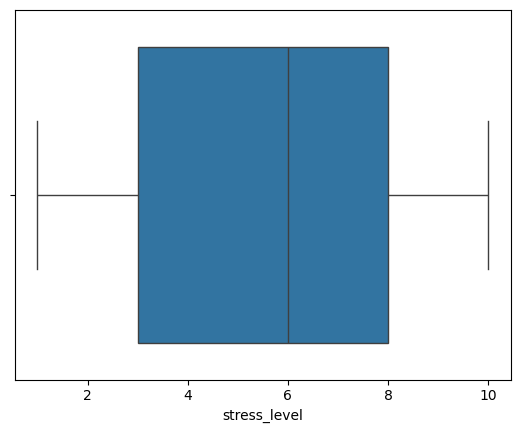

In [17]:
sns.boxplot(x=df['stress_level'])

<Axes: xlabel='stress_level', ylabel='Count'>

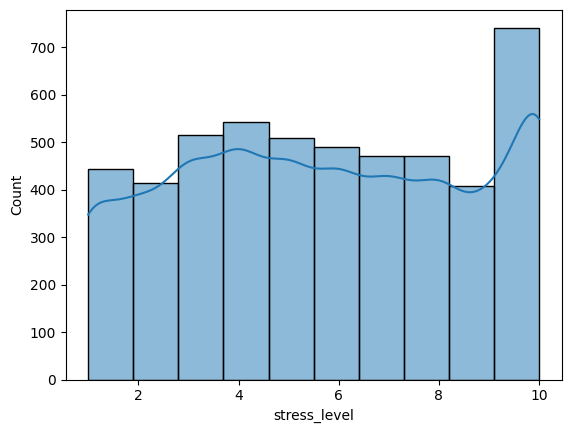

In [5]:
sns.histplot(df['stress_level'], bins=10, kde=True)

In [ ]:
df['stress_level'].skew()

np.float64(-0.015314631442646014)

In [18]:
num_corr = df.select_dtypes(include=['number']).corr()['stress_level']

df_encoded = pd.get_dummies(df[['gender', 'location_type']], drop_first=True)
cat_corr = df_encoded.corrwith(df['stress_level'])

all_corr = pd.concat([num_corr, cat_corr])
all_corr.sort_values(ascending=False)


,0
stress_level,1.000000
social_media_hours,0.954274
weekly_anxiety_score,0.848077
work_related_hours,0.826039
weekly_depression_score,0.812952
daily_screen_time_hours,0.665673
laptop_usage_hours,0.297954
tv_usage_hours,0.281782
phone_usage_hours,0.274263
tablet_usage_hours,0.163577


<Axes: >

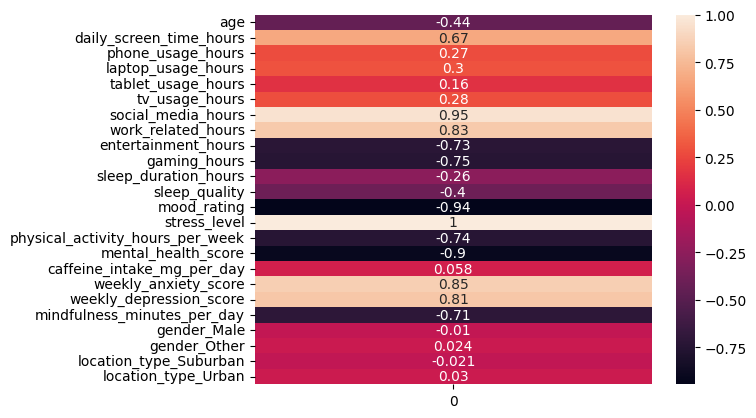

In [19]:
sns.heatmap(all_corr.to_frame(), annot=True)

**Data Preparation**
---

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   age                               5000 non-null   int64  
 1   gender                            5000 non-null   object 
 2   daily_screen_time_hours           5000 non-null   float64
 3   phone_usage_hours                 5000 non-null   float64
 4   laptop_usage_hours                5000 non-null   float64
 5   tablet_usage_hours                5000 non-null   float64
 6   tv_usage_hours                    5000 non-null   float64
 7   social_media_hours                5000 non-null   float64
 8   work_related_hours                5000 non-null   float64
 9   entertainment_hours               5000 non-null   float64
 10  gaming_hours                      5000 non-null   float64
 11  sleep_duration_hours              5000 non-null   float64
 12  sleep_

In [22]:
df = pd.get_dummies(df, columns=['gender', 'location_type'], drop_first=True)
df['uses_wellness_apps'] = df['uses_wellness_apps'].astype(int)
df['eats_healthy'] = df['eats_healthy'].astype(int)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   age                               5000 non-null   int64  
 1   daily_screen_time_hours           5000 non-null   float64
 2   phone_usage_hours                 5000 non-null   float64
 3   laptop_usage_hours                5000 non-null   float64
 4   tablet_usage_hours                5000 non-null   float64
 5   tv_usage_hours                    5000 non-null   float64
 6   social_media_hours                5000 non-null   float64
 7   work_related_hours                5000 non-null   float64
 8   entertainment_hours               5000 non-null   float64
 9   gaming_hours                      5000 non-null   float64
 10  sleep_duration_hours              5000 non-null   float64
 11  sleep_quality                     5000 non-null   float64
 12  mood_r

**Create Target Label**

In [26]:
def level_stress(x):
  if x <= 3:
    return 'low'
  elif x <=6:
    return 'medium'
  else:
    return 'high'
df['stress_level'] = df['stress_level'].apply(level_stress)

In [27]:
y = df['stress_level']
X = df.drop(columns='stress_level')

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [29]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
print('X_train_shape',X_train.shape)
print('X_test_shape',X_test.shape)
print('y_train_shape',y_train.shape)
print('y_test_shape',y_test.shape)

X_train_shape (4000, 25)
X_test_shape (1000, 25)
y_train_shape (4000,)
y_test_shape (1000,)


**Classification Models**
---

**Logistic Classifier**

In [31]:
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

In [33]:
lr_predict = lr_model.predict(X_test)

In [36]:
print("Accuracy:", accuracy_score(y_test, lr_predict))
print(classification_report(y_test, lr_predict))

Accuracy: 0.971
              precision    recall  f1-score   support

        high       0.98      0.97      0.97       418
         low       0.99      0.98      0.99       274
      medium       0.95      0.96      0.95       308

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



In [38]:
train_acc = lr_model.score(X_train, y_train)
test_acc = lr_model.score(X_test, y_test)
print(train_acc, test_acc)

0.97725 0.971


**RandomForestClassifier**

In [39]:
rf_model = RandomForestClassifier(n_estimators=300, max_depth=None, min_samples_leaf=2, random_state=2)
rf_model.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=2, n_estimators=300, random_state=2)

In [40]:
rf_predict = rf_model.predict(X_test)

In [41]:
print("Accuracy:", accuracy_score(y_test, rf_predict))
print(classification_report(y_test, rf_predict))

Accuracy: 0.973
              precision    recall  f1-score   support

        high       0.98      0.98      0.98       418
         low       0.98      0.99      0.98       274
      medium       0.96      0.95      0.96       308

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



**XGBClassifier**

In [42]:
xgb_model = XGBClassifier(n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='mlogloss',
    random_state=42)

In [44]:
mapping = {'low':0, 'medium':1, 'high':2}
y_train_num = y_train.map(mapping)
y_test_num = y_test.map(mapping)

In [45]:
xgb_model.fit(X_train, y_train_num)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [46]:
xgb_predict = xgb_model.predict(X_test)

In [49]:
print("Accuracy:", accuracy_score(y_test_num, xgb_predict))
print(classification_report(y_test_num, xgb_predict))

Accuracy: 0.976
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       274
           1       0.96      0.96      0.96       308
           2       0.98      0.98      0.98       418

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000



**Conclusion**
--

The classification models built in this project were able to predict stress levels (low / medium / high) with very high performance. Among all models, XGBoost achieved the best accuracy (0.98), followed by Random Forest (0.97) and Logistic Regression (0.97). This indicates that stress level can be effectively predicted using digital lifestyle and daily behavior features.

The feature importance analysis suggests that stress is not driven by technology usage alone. The strongest contributors to stress prediction were weekly anxiety score, weekly depression score, sleep quality, and work-related hours. Digital behavior variables such as screen time and social media usage still matter, but their impact is highly influenced by mental health and lifestyle conditions.

Machine learning provides more than descriptive insight — it validates that these patterns can be used to predict stress for new, unseen users. This makes predictive modeling more powerful than simply relying on correlation, because it captures non-linear relationships and interactions between multiple features.

Overall, this study demonstrates that a combination of digital lifestyle factors and mental health indicators can be used to accurately predict stress level, and XGBoost is the most optimal model for this dataset.